In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [31]:
class KNNRegressor():
    def fit(self, X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K,epsilon=1e-3):
    
        N=len(X)
        y_hat=np.zeros(N)
    
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
        
            idxt=np.argsort(dist2)[:K]  #indexing from a list ( asking to extract the points surrounds the particular K not all pts)
        
            gamma_k=np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
        
            y_hat[i]= gamma_k.dot(self.y[idxt])
        
        return y_hat

In [32]:
class ContValDat():
    
    def create(self,D,N):
        
        self.X=np.linspace(0,20,N).reshape(N,D)
        self.y=np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+
                                                np.random.randn(N,1)*0.2)
        
        
        return self.X, self.y
    
    def show(self):
        plt.figure
        plt.scatter(self.X, self.y)
        
        

In [33]:
myDat=ContValDat()

In [34]:
D=1
N=200
X,y=myDat.create(D,N)

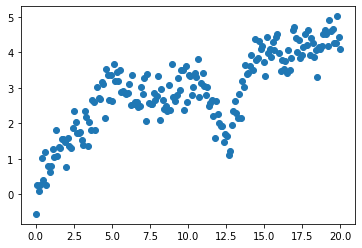

In [35]:
myDat.show()

In [36]:
knn=KNNRegressor()

In [47]:
knn.fit(X,y)
y_hat=knn.predict(X,150)

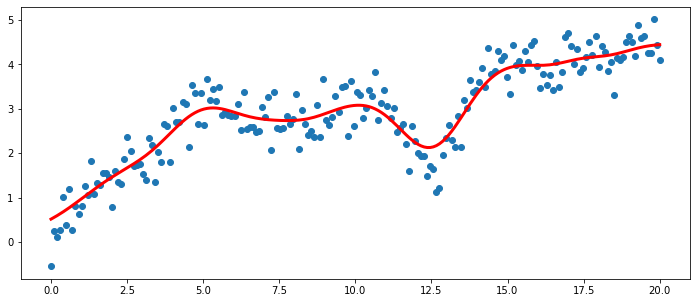

In [48]:
plt. figure(figsize=(12,5))

plt. scatter(X,y)

plt.plot(X,y_hat, color='#FF0000', linewidth=3) # use g or r or b or m or k or y 

In [49]:
# color= '#FF 00 00'
        # R   G  B
    
    # zig zag is over fitting lower k
    # smooth is not over fitting higher k 

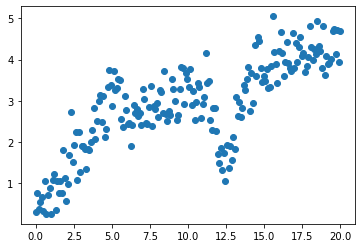

In [50]:
myTestDat=ContValDat()

X1, y1=myTestDat.create(D,N)
#X,y=myDat.create(1,200)

myTestDat.show()

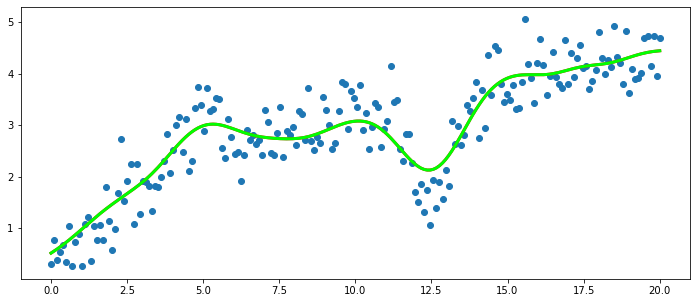

In [51]:
plt. figure(figsize=(12,5))

plt. scatter(X1,y1)

plt.plot(X,y_hat, color='#FF0000', linewidth=3) # use g or r or b or m or k 

plt.plot(X,y_hat, color='#00FF00', linewidth=3) # use g or r or b or m or k 

In [52]:
# use different k's 

In [53]:
K=10
K1=100

knn.fit(X,y)
y_hat=knn.predict(X,K)
y_hat2=knn.predict(X1,K1)

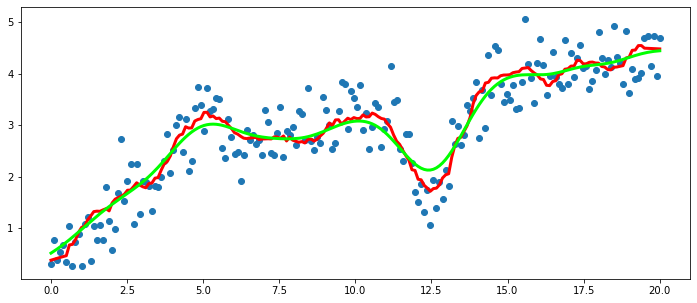

In [54]:
plt. figure(figsize=(12,5))

plt. scatter(X1,y1)

plt.plot(X,y_hat, color='#FF0000', linewidth=3) # use g or r or b or m or k first line

plt.plot(X1,y_hat2, color='#00FF00', linewidth=3) # use g or r or b or m or k second line